<a href="https://colab.research.google.com/github/hegame1998/Probability-/blob/main/Metropolis_Hastings_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

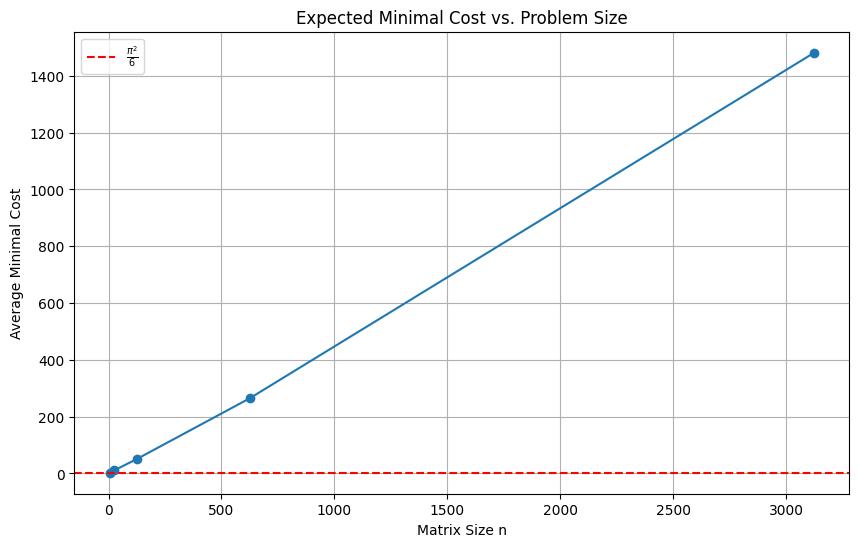

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def generate_cost_matrix(n):
    """Generate a n x n cost matrix with entries drawn uniformly from [0, 1]."""
    return np.random.uniform(0, 1, (n, n))

def calculate_cost(C, sigma):
    """Calculate the total cost for a given permutation sigma using cost matrix C."""
    return np.sum(C[np.arange(len(sigma)), sigma])

def propose_new_permutation(sigma):
    """Generate a new permutation by swapping two random elements of the current permutation."""
    idx = np.random.choice(len(sigma), 2, replace=False)
    sigma[idx[0]], sigma[idx[1]] = sigma[idx[1]], sigma[idx[0]]
    return sigma

def metropolis_hastings(C, beta, N):
    """Run the Metropolis-Hastings algorithm to find a minimizing permutation for the assignment cost."""
    n = len(C)
    sigma = np.random.permutation(n)
    current_cost = calculate_cost(C, sigma)

    for _ in range(N):
        new_sigma = sigma.copy()
        new_sigma = propose_new_permutation(new_sigma)
        new_cost = calculate_cost(C, new_sigma)
        if np.random.rand() < np.exp(-beta * (new_cost - current_cost)):
            sigma, current_cost = new_sigma, new_cost

    return current_cost

def run_simulation(n_values, beta, N, M):
    """Simulate the assignment problem across different sizes and calculate average minimal costs."""
    avg_costs = []
    for n in n_values:
        logging.info(f"Starting simulation for n = {n}")
        costs = [metropolis_hastings(generate_cost_matrix(n), beta, N) for _ in range(M)]
        avg_costs.append(np.mean(costs))
        logging.info(f"Average cost for n = {n}: {avg_costs[-1]}")
    return n_values, avg_costs

# Parameters
beta = 1.0  # Control parameter, moderate value to balance execution time and accuracy
N = 1000    # Total steps in Metropolis-Hastings; reduced for demonstration purposes
M = 10      # Number of simulations to run for each matrix size
n_values = [5 ** alpha for alpha in range(1, 6)]  # Reduced the upper limit for demonstration

# Run the simulation
n, avg_costs = run_simulation(n_values, beta, N, M)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(n, avg_costs, marker='o', linestyle='-')
plt.axhline(y=np.pi**2 / 6, color='r', linestyle='--', label=r'$\frac{\pi^2}{6}$')
plt.xlabel('Matrix Size n')
plt.ylabel('Average Minimal Cost')
plt.title('Expected Minimal Cost vs. Problem Size')
plt.legend()
plt.grid(True)
plt.show()

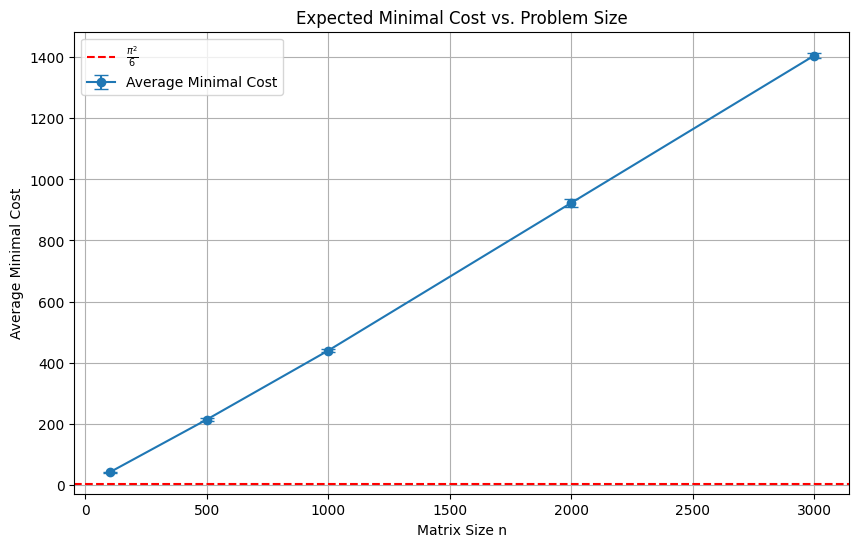

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import logging

# Set up basic configuration for logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def generate_cost_matrix(n):
    """Generate a n x n cost matrix with entries drawn uniformly from [0, 1]."""
    return np.random.uniform(0, 1, (n, n))

def calculate_cost(C, sigma):
    """Calculate the total cost for a given permutation sigma using cost matrix C."""
    return np.sum(C[np.arange(len(sigma)), sigma])

def propose_new_permutation(sigma):
    """Generate a new permutation by swapping two random elements of the current permutation."""
    idx = np.random.choice(len(sigma), 2, replace=False)
    sigma[idx[0]], sigma[idx[1]] = sigma[idx[1]], sigma[idx[0]]
    return sigma

def metropolis_hastings(C, beta, N):
    """Run the Metropolis-Hastings algorithm to find a minimizing permutation for the assignment cost."""
    n = len(C)
    sigma = np.random.permutation(n)
    current_cost = calculate_cost(C, sigma)

    for _ in range(N):
        new_sigma = sigma.copy()
        new_sigma = propose_new_permutation(new_sigma)
        new_cost = calculate_cost(C, new_sigma)
        if np.random.rand() < np.exp(-beta * (new_cost - current_cost)):
            sigma, current_cost = new_sigma, new_cost

    return current_cost

def run_simulation(n_values, beta, N, M):
    """Simulate the assignment problem across different sizes and calculate average minimal costs and variances."""
    avg_costs = []
    std_devs = []

    for n in n_values:
        logging.info(f"Starting simulation for n = {n}")
        costs = [metropolis_hastings(generate_cost_matrix(n), beta, N) for _ in range(M)]
        avg_costs.append(np.mean(costs))
        std_devs.append(np.std(costs))
        logging.info(f"Average cost for n = {n}: {avg_costs[-1]}, Std Dev: {std_devs[-1]}")

    return n_values, avg_costs, std_devs

# Parameters
beta = 1.0  # Control parameter
N = 1000    # Total steps in Metropolis-Hastings
M = 10      # Number of simulations to run for each matrix size
n_values = [100, 500, 1000, 2000, 3000]  # Different matrix sizes

# Run the simulation
n, avg_costs, std_devs = run_simulation(n_values, beta, N, M)

# Plotting the results with error bars for standard deviation
plt.figure(figsize=(10, 6))
plt.errorbar(n, avg_costs, yerr=std_devs, fmt='o-', capsize=5, label='Average Minimal Cost')
plt.axhline(y=np.pi**2 / 6, color='r', linestyle='--', label=r'$\frac{\pi^2}{6}$')
plt.xlabel('Matrix Size n')
plt.ylabel('Average Minimal Cost')
plt.title('Expected Minimal Cost vs. Problem Size')
plt.legend()
plt.grid(True)
plt.show()
